In [688]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [689]:
train_data = pd.read_csv('../datasets/train.csv')
test_data = pd.read_csv('../datasets/test.csv')


In [690]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [691]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [692]:
data = pd.concat([train_data, test_data], axis=0,ignore_index=True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [693]:
def see_null(reverse=False, d=data):
    if reverse:
        return d.isnull().sum()[d.isnull().sum()==0]
    else:
        return d.isnull().sum()[d.isnull().sum()!=0]

In [694]:
see_null()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [695]:
LB = LabelEncoder()

In [696]:
data_filling =data.fillna({'MSZoning': data['MSZoning'].mode().values[0]})
data_filling['MSZoning'].isna().sum()

0

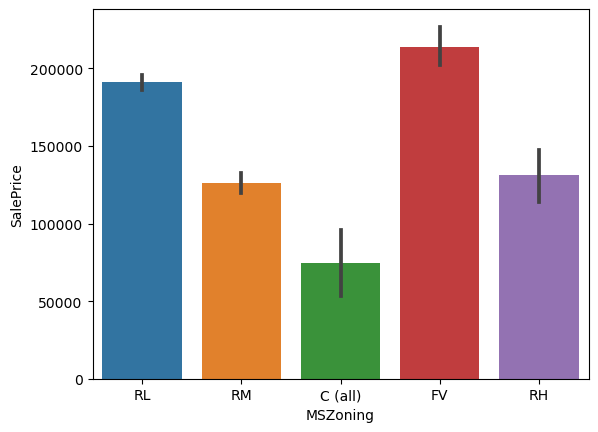

In [697]:
sns.barplot(x = 'MSZoning', y='SalePrice', data=data_filling)
plt.show()

In [698]:
data_filling['MSZoning'] = LB.fit_transform(data_filling['MSZoning'])

0.35179909657067737

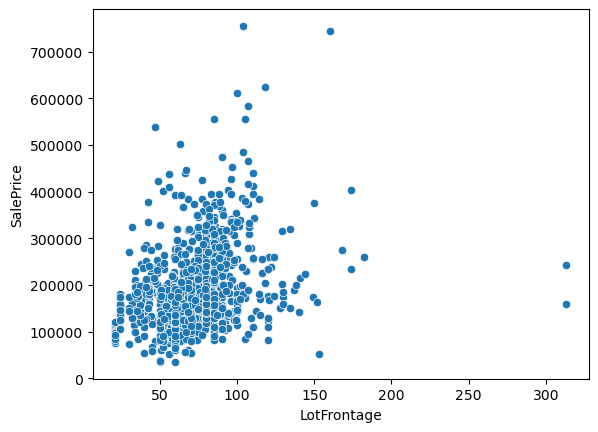

In [699]:
sns.scatterplot(x = "LotFrontage", y='SalePrice',data = data)
data.corr(numeric_only=True)["LotFrontage"]['SalePrice']

In [700]:
data_filling['LotFrontage'].isnull().mean()*100 , train_data['LotFrontage'].isnull().mean()*100, test_data['LotFrontage'].isnull().mean()*100

(16.649537512846866, 17.73972602739726, 15.558601782042494)

In [701]:
data_filling.drop(['LotFrontage'],axis=1, inplace=True)

In [702]:
see_null(d=data_filling)

Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [703]:
data_filling.drop(['Alley'],axis=1,inplace=True)

In [704]:
see_null(d=data_filling)

Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

<Axes: xlabel='SalePrice', ylabel='MasVnrType'>

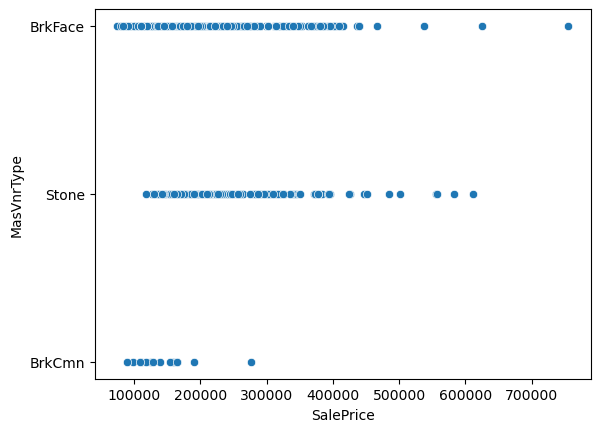

In [705]:
sns.scatterplot(y='MasVnrType', x='SalePrice', data= data_filling)

In [706]:
data_filling.drop(['MasVnrType'], axis=1, inplace=True)

In [707]:
see_null(d = data_filling)

Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [708]:
data_filling.drop(['FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [709]:
see_null(d=data_filling)

Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

In [710]:
data_filling['Utilities']

0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
2914    AllPub
2915    AllPub
2916    AllPub
2917    AllPub
2918    AllPub
Name: Utilities, Length: 2919, dtype: object

In [711]:
data_filling[data['Utilities'].isnull()]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1915,1916,30,3,21780,Grvl,Reg,Lvl,NaN,Inside,Gtl,...,0,0,0,0,0,3,2009,ConLD,Normal,NaN
1945,1946,20,3,31220,Pave,IR1,Bnk,NaN,FR2,Gtl,...,144,0,0,0,750,5,2008,WD,Normal,NaN


<Axes: xlabel='Utilities', ylabel='Count'>

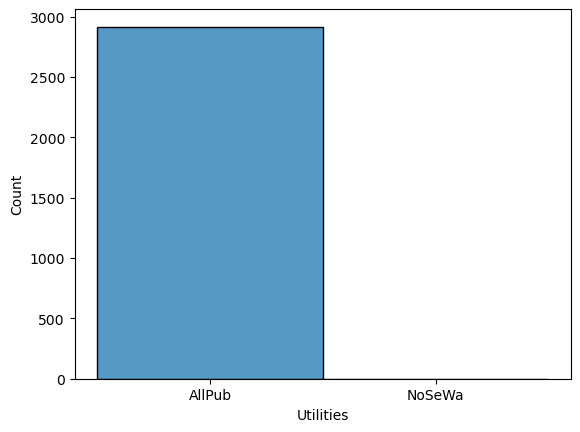

In [712]:
sns.histplot(data_filling['Utilities'])

In [713]:
data_filling['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

<Axes: xlabel='Utilities', ylabel='SalePrice'>

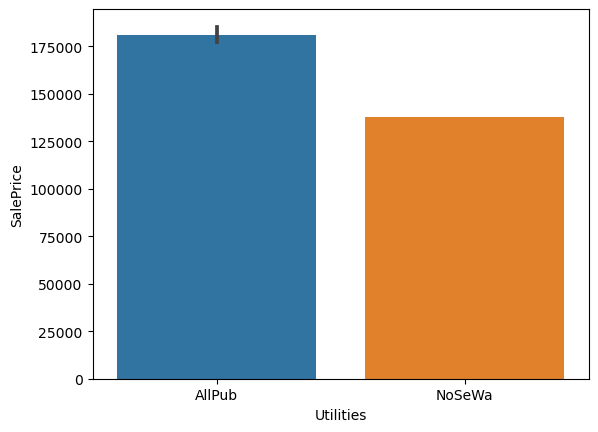

In [714]:
sns.barplot(x='Utilities', y='SalePrice', data=data_filling)

In [715]:
data_filling['Utilities'] = data_filling['Utilities'].fillna(data_filling['Utilities'].mode()[0])

In [716]:
data_filling['Utilities']=LB.fit_transform(data_filling['Utilities'])

In [717]:
see_null(d=data_filling)

Exterior1st        1
Exterior2nd        1
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

In [718]:
null_list = see_null(d = data_filling).index
null_list

Index(['Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'SaleType', 'SalePrice'],
      dtype='object')

In [719]:
cat_column = data_filling[null_list].select_dtypes(['object']).columns
cat_column

Index(['Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [720]:
for i in cat_column:
    data_filling[i] = data_filling[i].fillna(data_filling[i].mode()[0])
    data_filling[i] = LB.fit_transform(data_filling[i])


In [721]:
see_null(d= data_filling)

MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

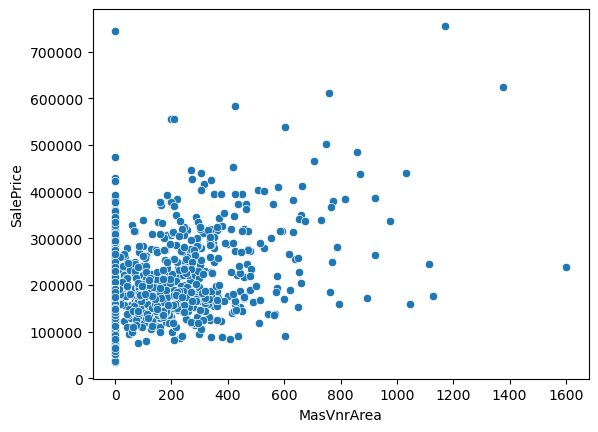

In [722]:
sns.scatterplot(x='MasVnrArea' , y="SalePrice", data=data_filling)

In [723]:
data_filling['MasVnrArea'] = data_filling['MasVnrArea'].fillna(np.mean(data_filling['MasVnrArea']))

In [724]:
see_null(d = data_filling)

BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

In [725]:
data_filling['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
2914       NaN
2915    1970.0
2916    1960.0
2917       NaN
2918    1993.0
Name: GarageYrBlt, Length: 2919, dtype: float64

<Axes: xlabel='GarageYrBlt', ylabel='SalePrice'>

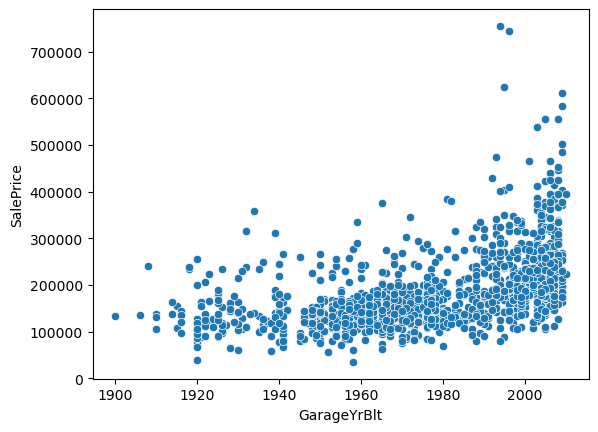

In [726]:
sns.scatterplot(x=data_filling['GarageYrBlt'], y=data_filling['SalePrice'])

In [727]:
data_filling[['YearBuilt', 'GarageYrBlt']]

,YearBuilt,GarageYrBlt
0,2003,2003.0
1,1976,1976.0
2,2001,2001.0
3,1915,1998.0
4,2000,2000.0
...,...,...
2914,1970,NaN
2915,1970,1970.0
2916,1960,1960.0
2917,1992,NaN


In [728]:
data_filling[data_filling['YearBuilt'] != data_filling['GarageYrBlt']][['YearBuilt', 'GarageYrBlt']]

,YearBuilt,GarageYrBlt
3,1915,1998.0
15,1929,1991.0
26,1951,2005.0
27,2007,2008.0
29,1927,1920.0
...,...,...
2893,1916,NaN
2909,1970,NaN
2913,1970,NaN
2914,1970,NaN


In [729]:
columns = list(data_filling.columns)
y_built = data_filling[data_filling['GarageYrBlt'].isnull()]['YearBuilt']
ind = data_filling[data_filling['GarageYrBlt'].isnull()].index
data_filling.iloc[ind,columns.index('GarageYrBlt')] = data_filling.iloc[ind,columns.index('YearBuilt')]

In [730]:
na_ind = see_null(d=data_filling).index

In [731]:
data_filling[na_ind]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,SalePrice
0,706.0,0.0,150.0,856.0,1.0,0.0,2.0,548.0,208500.0
1,978.0,0.0,284.0,1262.0,0.0,1.0,2.0,460.0,181500.0
2,486.0,0.0,434.0,920.0,1.0,0.0,2.0,608.0,223500.0
3,216.0,0.0,540.0,756.0,1.0,0.0,3.0,642.0,140000.0
4,655.0,0.0,490.0,1145.0,1.0,0.0,3.0,836.0,250000.0
...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,546.0,546.0,0.0,0.0,0.0,0.0,NaN
2915,252.0,0.0,294.0,546.0,0.0,0.0,1.0,286.0,NaN
2916,1224.0,0.0,0.0,1224.0,1.0,0.0,2.0,576.0,NaN
2917,337.0,0.0,575.0,912.0,0.0,1.0,0.0,0.0,NaN


In [732]:
data_filling['BsmtFinType1']

0       2
1       0
2       2
3       0
4       2
       ..
2914    5
2915    4
2916    0
2917    2
2918    3
Name: BsmtFinType1, Length: 2919, dtype: int32

In [733]:
data['BsmtFinType1'].isna().sum()

79

In [734]:
data[['LotArea', 'BsmtFinSF1']]

,LotArea,BsmtFinSF1
0,8450,706.0
1,9600,978.0
2,11250,486.0
3,9550,216.0
4,14260,655.0
...,...,...
2914,1936,0.0
2915,1894,252.0
2916,20000,1224.0
2917,10441,337.0


In [735]:
data[['BsmtFinType2','BsmtFinSF2']]

,BsmtFinType2,BsmtFinSF2
0,Unf,0.0
1,Unf,0.0
2,Unf,0.0
3,Unf,0.0
4,Unf,0.0
...,...,...
2914,Unf,0.0
2915,Unf,0.0
2916,Unf,0.0
2917,Unf,0.0


In [736]:
data['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64

In [737]:
data['BsmtFinSF2'].value_counts()

BsmtFinSF2
0.0       2571
180.0        5
294.0        5
435.0        3
483.0        3
          ... 
600.0        1
211.0        1
1031.0       1
438.0        1
297.0        1
Name: count, Length: 272, dtype: int64

In [738]:
data_filling['BsmtFinSF2'] = data_filling['BsmtFinSF2'].fillna(0.0)

In [739]:
na_ind = see_null(d=data_filling).index


In [740]:
data_filling[na_ind]

,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,SalePrice
0,706.0,150.0,856.0,1.0,0.0,2.0,548.0,208500.0
1,978.0,284.0,1262.0,0.0,1.0,2.0,460.0,181500.0
2,486.0,434.0,920.0,1.0,0.0,2.0,608.0,223500.0
3,216.0,540.0,756.0,1.0,0.0,3.0,642.0,140000.0
4,655.0,490.0,1145.0,1.0,0.0,3.0,836.0,250000.0
...,...,...,...,...,...,...,...,...
2914,0.0,546.0,546.0,0.0,0.0,0.0,0.0,NaN
2915,252.0,294.0,546.0,0.0,0.0,1.0,286.0,NaN
2916,1224.0,0.0,1224.0,1.0,0.0,2.0,576.0,NaN
2917,337.0,575.0,912.0,0.0,1.0,0.0,0.0,NaN


In [741]:
data_filling['BsmtFinSF1'].fillna(np.mean(data_filling['BsmtFinSF1']), inplace=True)

In [742]:
na_ind = see_null(d=data_filling).index
data_filling[na_ind]

,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,SalePrice
0,150.0,856.0,1.0,0.0,2.0,548.0,208500.0
1,284.0,1262.0,0.0,1.0,2.0,460.0,181500.0
2,434.0,920.0,1.0,0.0,2.0,608.0,223500.0
3,540.0,756.0,1.0,0.0,3.0,642.0,140000.0
4,490.0,1145.0,1.0,0.0,3.0,836.0,250000.0
...,...,...,...,...,...,...,...
2914,546.0,546.0,0.0,0.0,0.0,0.0,NaN
2915,294.0,546.0,0.0,0.0,1.0,286.0,NaN
2916,0.0,1224.0,1.0,0.0,2.0,576.0,NaN
2917,575.0,912.0,0.0,1.0,0.0,0.0,NaN


In [743]:
data_filling['BsmtUnfSF'] = data_filling['BsmtUnfSF'].fillna(np.mean(data_filling['BsmtUnfSF']))

In [744]:
full_fill = data_filling[data_filling['TotalBsmtSF'].isnull()][['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
full_fill

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2120,441.423235,0.0,560.772104,NaN


In [745]:
full_fill['TotalBsmtSF'] = full_fill['BsmtFinSF1']+full_fill['BsmtFinSF2']+full_fill['BsmtUnfSF']
full_fill

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2120,441.423235,0.0,560.772104,1002.195339


In [746]:
data_filling.iloc[full_fill.index,columns.index('TotalBsmtSF')] = full_fill['TotalBsmtSF'] 

In [747]:
na_ind = see_null(d=data_filling).index
data_filling[na_ind]

,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,SalePrice
0,1.0,0.0,2.0,548.0,208500.0
1,0.0,1.0,2.0,460.0,181500.0
2,1.0,0.0,2.0,608.0,223500.0
3,1.0,0.0,3.0,642.0,140000.0
4,1.0,0.0,3.0,836.0,250000.0
...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,NaN
2915,0.0,0.0,1.0,286.0,NaN
2916,1.0,0.0,2.0,576.0,NaN
2917,0.0,1.0,0.0,0.0,NaN


In [748]:
data[['BsmtFullBath','BsmtHalfBath','GarageCars']]

,BsmtFullBath,BsmtHalfBath,GarageCars
0,1.0,0.0,2.0
1,0.0,1.0,2.0
2,1.0,0.0,2.0
3,1.0,0.0,3.0
4,1.0,0.0,3.0
...,...,...,...
2914,0.0,0.0,0.0
2915,0.0,0.0,1.0
2916,1.0,0.0,2.0
2917,0.0,1.0,0.0


In [749]:
data_filling[['GarageCars','GarageArea']]=data_filling[['GarageCars','GarageArea']].fillna({'GarageCars':0, 'GarageArea':0})

In [750]:
na_ind = see_null(d=data_filling).index
data_filling[na_ind]

,BsmtFullBath,BsmtHalfBath,SalePrice
0,1.0,0.0,208500.0
1,0.0,1.0,181500.0
2,1.0,0.0,223500.0
3,1.0,0.0,140000.0
4,1.0,0.0,250000.0
...,...,...,...
2914,0.0,0.0,NaN
2915,0.0,0.0,NaN
2916,1.0,0.0,NaN
2917,0.0,1.0,NaN


<Axes: xlabel='TotalBsmtSF', ylabel='BsmtFullBath'>

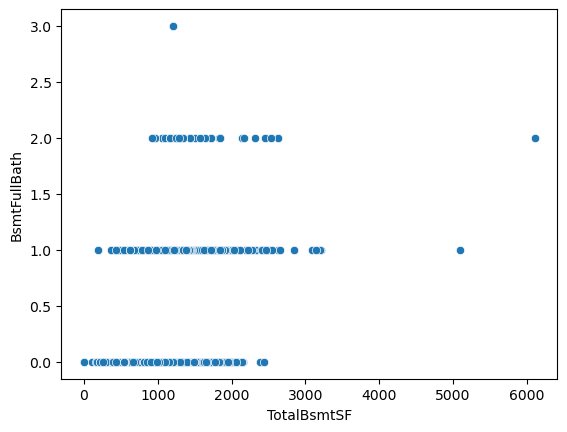

In [751]:
sns.scatterplot(x=data_filling['TotalBsmtSF'], y=data_filling['BsmtFullBath'])

In [752]:
data_filling[['BsmtFullBath','BsmtHalfBath','TotalBsmtSF']].corr()

,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
BsmtFullBath,1.000000,-0.148832,0.325623
BsmtHalfBath,-0.148832,1.000000,0.012396
TotalBsmtSF,0.325623,0.012396,1.000000


In [753]:
see_null(d=data_filling)

BsmtFullBath       2
BsmtHalfBath       2
SalePrice       1459
dtype: int64

In [754]:
x = data_filling[['BsmtFullBath','BsmtHalfBath','TotalBsmtSF']].dropna()

In [755]:
y = x['BsmtFullBath'].values
X = x['TotalBsmtSF'].values.reshape(-1,1)

In [756]:
svm = SVC()

In [757]:
svm.fit(X, y)

SVC()

In [758]:
data_filling[data_filling['BsmtFullBath'].isna()][['BsmtFullBath','BsmtHalfBath','TotalBsmtSF']]

,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
2120,NaN,NaN,1002.195339
2188,NaN,NaN,0.000000


In [759]:
svm.predict([[1002.195339]])

array([0.])

In [760]:
y_pred = svm.predict(X)

In [761]:
accuracy_score(y, y_pred)

0.6242715118272197

In [766]:
data_filling.iloc[2120,columns.index('BsmtFullBath')] = 0

In [767]:
data_filling.iloc[2188,columns.index('BsmtFullBath')] = 0

In [768]:
data_filling.iloc[2188,columns.index('BsmtHalfBath')] = 0

In [770]:
data_filling[data_filling['BsmtHalfBath'].isna()][['BsmtFullBath','BsmtHalfBath','TotalBsmtSF']]

,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
2120,0.0,NaN,1002.195339


In [771]:
X = x[['BsmtFullBath', 'TotalBsmtSF']]
y = x['BsmtHalfBath']

In [772]:
svm2=SVC()
svm2.fit(X,y)

SVC()

In [773]:
svm2.predict([[0,1002.195339]])

C:\Users\snirt\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0.])

In [778]:
y.value_counts()

BsmtHalfBath
0.0    2742
1.0     171
2.0       4
Name: count, dtype: int64

In [779]:
data_filling.iloc[2120,columns.index('BsmtHalfBath')] = 0

In [781]:
see_null(d =data_filling)

SalePrice    1459
dtype: int64

In [782]:
data_filling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int32  
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   int32  
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [786]:
cata_col = data_filling.select_dtypes(['object']).columns
cata_col

Index(['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive', 'SaleCondition'],
      dtype='object')

In [787]:
for i in cata_col:
    data_filling[i]=LB.fit_transform(data_filling[i])

In [789]:
data_filling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int32  
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int32  
 5   LotShape       2919 non-null   int32  
 6   LandContour    2919 non-null   int32  
 7   Utilities      2919 non-null   int32  
 8   LotConfig      2919 non-null   int32  
 9   LandSlope      2919 non-null   int32  
 10  Neighborhood   2919 non-null   int32  
 11  Condition1     2919 non-null   int32  
 12  Condition2     2919 non-null   int32  
 13  BldgType       2919 non-null   int32  
 14  HouseStyle     2919 non-null   int32  
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [803]:
clean_train = data_filling[~data_filling['SalePrice'].isnull()]

In [804]:
clean_test = data_filling[data_filling['SalePrice'].isnull()]

In [805]:
clean_train.to_csv('../datasets/clean_train.csv',index=False)

In [806]:
clean_test.to_csv('../datasets/clean_test.csv',index=False)

In [807]:
data_filling.to_csv('../datasets/clean_alldata.csv', index=False)